# Final Project
---------------------------------------------------------------------
## CIS 600 Fundamental Data & Knowledge Mining
## Prof. Ying Lin
## 11/8/2022

### Anthony Redamonti, Dana Dippery, Joshua, Hal Baird
### Syracuse University

### Introduction 
The following project was implemented in Jupyter Notebooks using Anaconda 3 with Python 3 (ipykernel). The goal of the project is below.

Analyze the dataset provided in the file "SMSSpamCollection."
- Data Preparation: Drop duplicates
- Create dataframe of all words with IsSpam feature.

Apply the Association Rule Analysis on all of the words with IsSpam=Yes being the consequent.

### Section 1: Data Preparation
- The data must be split into different dataframes:
    - Divide SPAM and HAM messages into lists.
    - Dataframe containing all Spam messages. Duplicates will be dropped.
    - Dataframe containing all Ham messages. Duplicates will be dropped.
    - Transpose the HAM and SPAM dataframes.
    - Dataframe of all words (SPAM and HAM) with IsSpam feature.

#### Section 1.1: Divide all SPAM and HAM messages
- The ham and spam messages are divided into lists below.
- The first word (HAM/SPAM) indicator has been removed from each message in the lists.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# return a complete string from a list of strings.
def listToString(s):
 
    str1 = ""
 
    for ele in s:
        str1 += ele
        str1 += " "
 
    return str1


# open the dataset
spamFile = open('SMSSpamCollection', 'r')
Lines = spamFile.readlines()

hamEntriesList = []
spamEntriesList = []

# sort the texts based on first word: spam or ham
for line in Lines:
    
    # Strips the newline character    
    line = line.strip()
    
    words = line.split()
    if(words[0] == "ham"):
        hamEntriesList.append(listToString(words[1:]))
    elif(words[0] == "spam"):
        spamEntriesList.append(listToString(words[1:]))

#### Section 1.2: SPAM Message Dataframe
- Below is the dataframe containing only SPAM messages.

In [83]:
dfSpam = pd.DataFrame({'text': spamEntriesList})
cv = CountVectorizer(stop_words='english') 
cv_matrix_spam = cv.fit_transform(dfSpam['text'])

df_dtm_spam = pd.DataFrame(cv_matrix_spam.toarray(), columns=cv.get_feature_names_out())
df_dtm_spam.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02072069400,...,yo,yourinclusive,yr,yrs,zebra,zed,zoe,zouk,ãº1,œharry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
def dropNumFeatures(columnList, dataframe):
    for word in columnList:
        wordStr = str(word)
        if(any(char.isdigit() for char in wordStr)):
            dataframe.drop(word, inplace = True, axis = 1)

column_headers_spam = df_dtm_spam.columns.values.tolist()                        
dropNumFeatures(column_headers_spam, df_dtm_spam)
df_dtm_spam.head()

,ab,aberdeen,abroad,abta,abuse,ac,access,accessible,accident,accommodation,...,ymca,yo,yourinclusive,yr,yrs,zebra,zed,zoe,zouk,œharry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
originalLength = len(df_dtm_spam)

# drop all duplicate entries.
df_dtm_spam.drop_duplicates(inplace = True)

newLength = len(df_dtm_spam)
print("Number of duplicate entries dropped:", originalLength - newLength)

Number of duplicate entries dropped: 180


#### Section 1.3: HAM Message Dataframe
- Below is the dataframe containing only HAM messages.

In [86]:
dfHam = pd.DataFrame({'text': hamEntriesList})
cv_matrix_ham = cv.fit_transform(dfHam['text'])

df_dtm_ham = pd.DataFrame(cv_matrix_ham.toarray(), columns=cv.get_feature_names_out())
df_dtm_ham.head()

,000pes,0125698789,0quit,10,100,1000s,1030,11,1120,116,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zyada,ã¼,ãœ,éˆ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
column_headers_ham = df_dtm_ham.columns.values.tolist()        
dropNumFeatures(column_headers_ham, df_dtm_ham)
df_dtm_ham.head()

,____,aa,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zyada,ã¼,ãœ,éˆ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
originalLength = len(df_dtm_ham)

# drop all duplicate entries.
df_dtm_ham.drop_duplicates(inplace = True)

newLength = len(df_dtm_ham)
print("Number of duplicate entries dropped:", originalLength - newLength)

Number of duplicate entries dropped: 379


#### Section 1.4: Train Test Split
- The data will be divided for training/validation purposes.

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sbn

X_spam = df_dtm_spam
X_ham = df_dtm_ham

# pick any random column as target (doesn't matter because we are not dropping it from X)
y_spam = df_dtm_spam.iloc[:,0]
y_ham = df_dtm_ham.iloc[:, 0] 

# 70% training: X_ham_train, X_spam_train
# 30% testing: X_ham_test, X_spam_test
X_ham_train, X_ham_test, y_ham_train, y_ham_test = train_test_split(X_ham, y_ham, test_size = 0.3, random_state = 16)
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(X_spam, y_spam, test_size = 0.3, random_state = 16)

#### Section 1.5: Transpose SPAM and HAM
- The SPAM and HAM dataframes will now be transposed.

In [90]:
totalHam_train = X_ham_train.sum()
totalSpam_train = X_spam_train.sum()
dfTotalHam_train = totalHam_train.to_frame()
dfTotalSpam_train = totalSpam_train.to_frame()

totalHam_test = X_ham_test.sum()
totalSpam_test = X_spam_test.sum()
dfTotalHam_test = totalHam_test.to_frame()
dfTotalSpam_test = totalSpam_test.to_frame()

dfTotalHam_train.columns = ['Ham']
dfTotalSpam_train.columns = ['Spam']
dfTotalHam_test.columns = ['Ham']
dfTotalSpam_test.columns = ['Spam']

dfTotalHam_train = dfTotalHam_train.transpose()
dfTotalSpam_train = dfTotalSpam_train.transpose()
dfTotalHam_test = dfTotalHam_test.transpose()
dfTotalSpam_test = dfTotalSpam_test.transpose()

dfTotalHam_test.head()

,____,aa,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zyada,ã¼,ãœ,éˆ
Ham,0,0,0,1,0,1,0,0,0,0,...,0,0,2,0,1,1,1,41,7,0


In [91]:
dfTotalHam_test.shape

(1, 6451)

In [92]:
dfTotalSpam_test.head()

,ab,aberdeen,abroad,abta,abuse,ac,access,accessible,accident,accommodation,...,ymca,yo,yourinclusive,yr,yrs,zebra,zed,zoe,zouk,œharry
Spam,0,0,1,3,1,1,2,0,1,0,...,0,0,0,1,0,0,1,1,1,0


In [93]:
dfTotalSpam_test.shape

(1, 1762)

#### Section 1.6: All Words Dataframe
- Below is the dataframe containing both SPAM and HAM words.

In [94]:
def createListOfWords(dataframe):
    listOfWords = []
    for feature in dataframe.columns:
        for num in range(dataframe.at[dataframe.index[0], feature]):
            listOfWords.append(feature)
    return listOfWords

wordListHam_train = createListOfWords(dfTotalHam_train)
wordListSpam_train = createListOfWords(dfTotalSpam_train)
wordListHam_test = createListOfWords(dfTotalHam_test)
wordListSpam_test = createListOfWords(dfTotalSpam_test)

dfWordsSpam_train = pd.DataFrame({'words': wordListSpam_train})
dfWordsHam_train = pd.DataFrame({'words': wordListHam_train})
dfWordsSpam_test = pd.DataFrame({'words': wordListSpam_test})
dfWordsHam_test = pd.DataFrame({'words': wordListHam_test})

# add a column indicating whether it's a SPAM message.
isSpamList1_train = []
for x in range(len(dfWordsSpam_train)):
    isSpamList1_train.append("Yes")
isSpamArray1_train = np.array(isSpamList1_train)
dfWordsSpam_train['IsSpam'] = isSpamArray1_train

# add a column indicating whether it's a SPAM message.
isSpamList2_train = []
for x in range(len(dfWordsHam_train)):
    isSpamList2_train.append("No")
isSpamArray2_train = np.array(isSpamList2_train)
dfWordsHam_train['IsSpam'] = isSpamArray2_train

# add a column indicating whether it's a SPAM message.
isSpamList1_test = []
for x in range(len(dfWordsSpam_test)):
    isSpamList1_test.append("Yes")
isSpamArray1_test = np.array(isSpamList1_test)
dfWordsSpam_test['IsSpam'] = isSpamArray1_test

# add a column indicating whether it's a SPAM message.
isSpamList2_test = []
for x in range(len(dfWordsHam_test)):
    isSpamList2_test.append("No")
isSpamArray2_test = np.array(isSpamList2_test)
dfWordsHam_test['IsSpam'] = isSpamArray2_test

# combine all training words
allWordsDf_train = pd.concat([dfWordsSpam_train, dfWordsHam_train], sort=False)

# combine all testing words
allWordsDf_test = pd.concat([dfWordsSpam_test, dfWordsHam_test], sort=False)

allWordsDf_train

,words,IsSpam
0,ab,Yes
1,aberdeen,Yes
2,ac,Yes
3,ac,Yes
4,ac,Yes
...,...,...
21414,ãœ,No
21415,ãœ,No
21416,ãœ,No
21417,ãœ,No


### Section 2: Association Rule Analysis
- Below is the association rule analysis of all words in the dataframe.

In [95]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [96]:
# Prepare Dataset for Association Rule Mining
allWordsDf_train = allWordsDf_train.astype('str')
allWordsDf_train[allWordsDf_train.columns] = allWordsDf_train.apply(lambda x: x.str.strip())
allWordsDf_train = allWordsDf_train.astype('object')
allWordsDf_train = pd.DataFrame({col: str(col)+'=' for col in allWordsDf_train}, index=allWordsDf_train.index) + allWordsDf_train.astype(str)

# Prepare Dataset for Association Rule Mining
allWordsDf_test = allWordsDf_test.astype('str')
allWordsDf_test[allWordsDf_test.columns] = allWordsDf_test.apply(lambda x: x.str.strip())
allWordsDf_test = allWordsDf_test.astype('object')
allWordsDf_test = pd.DataFrame({col: str(col)+'=' for col in allWordsDf_test}, index=allWordsDf_test.index) + allWordsDf_test.astype(str)

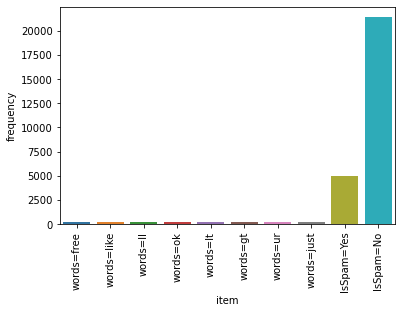

In [97]:
# Visualize Frequent Itemsets
import matplotlib.pyplot as plt
melted_data = pd.melt(allWordsDf_train)
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [98]:
# Use Association Rules from Mlxtend Library

def returnListOfRecords(dataframe):
    records = []
    for i in range(0,len(dataframe)):
        records.append([str(dataframe.values[i,j]) for j in range(0, len(dataframe.columns))])
    return records

records_train = returnListOfRecords(allWordsDf_train)
records_test = returnListOfRecords(allWordsDf_test)

te_train = TransactionEncoder()
te_ary_train = te_train.fit(records_train).transform(records_train)
df_train = pd.DataFrame(te_ary_train, columns=te_train.columns_)
frequent_itemsets_train = apriori(df_train, min_support=0.002, use_colnames=True)
frequent_itemsets_train.sort_values(by='support',ascending=False).head(5)

te_test = TransactionEncoder()
te_ary_test = te_test.fit(records_test).transform(records_test)
df_test = pd.DataFrame(te_ary_test, columns=te_test.columns_)
frequent_itemsets_test = apriori(df_test, min_support=0.002, use_colnames=True)

In [99]:
rules_train = association_rules(frequent_itemsets_train, metric="lift", min_threshold=1)
rules_train[(rules_train['lift']>1) & (rules_train['confidence'] > 0.08)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(words=ask),(IsSpam=No),0.002537,0.811049,0.002537,1.000000,1.232971,0.000479,inf
2,(words=babe),(IsSpam=No),0.002158,0.811049,0.002007,0.929825,1.146446,0.000256,2.692548
5,(words=come),(IsSpam=No),0.005680,0.811049,0.005604,0.986667,1.216531,0.000997,14.171305
7,(words=da),(IsSpam=No),0.003673,0.811049,0.003673,1.000000,1.232971,0.000694,inf
9,(words=day),(IsSpam=No),0.004923,0.811049,0.004468,0.907692,1.119158,0.000476,2.046966
11,(words=dear),(IsSpam=No),0.002651,0.811049,0.002234,0.842857,1.039218,0.000084,1.202414
13,(words=did),(IsSpam=No),0.003067,0.811049,0.003029,0.987654,1.217749,0.000542,15.305010
15,(words=doing),(IsSpam=No),0.002423,0.811049,0.002423,1.000000,1.232971,0.000458,inf
17,(words=don),(IsSpam=No),0.004014,0.811049,0.003787,0.943396,1.163180,0.000531,3.338130
19,(words=dont),(IsSpam=No),0.003749,0.811049,0.003484,0.929293,1.145791,0.000443,2.672303


In [100]:
rules_test = association_rules(frequent_itemsets_test, metric="lift", min_threshold=1)
rules_test[(rules_test['lift']>1) & (rules_test['confidence'] > 0.08)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(words=amp),(IsSpam=No),0.002669,0.82276,0.002669,1.000000,1.215422,0.000473,inf
2,(words=care),(IsSpam=No),0.002324,0.82276,0.002238,0.962963,1.170406,0.000326,4.785487
5,(words=come),(IsSpam=No),0.005509,0.82276,0.005509,1.000000,1.215422,0.000976,inf
7,(words=cos),(IsSpam=No),0.002066,0.82276,0.002066,1.000000,1.215422,0.000366,inf
9,(words=da),(IsSpam=No),0.003874,0.82276,0.003874,1.000000,1.215422,0.000687,inf
11,(words=day),(IsSpam=No),0.006026,0.82276,0.005767,0.957143,1.163332,0.000810,4.135606
13,(words=dear),(IsSpam=No),0.002496,0.82276,0.002238,0.896552,1.089688,0.000184,1.713322
15,(words=did),(IsSpam=No),0.003443,0.82276,0.003357,0.975000,1.185036,0.000524,7.089610
17,(words=don),(IsSpam=No),0.003443,0.82276,0.003443,1.000000,1.215422,0.000610,inf
19,(words=dont),(IsSpam=No),0.003099,0.82276,0.002927,0.944444,1.147898,0.000377,3.190325


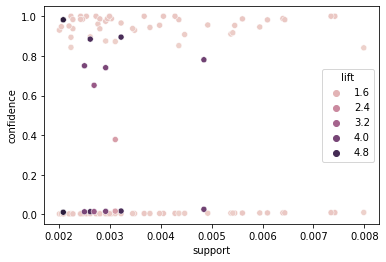

In [101]:
b_train = sns.scatterplot(data=rules_train,x='support',y='confidence',hue='lift')
plt.show()

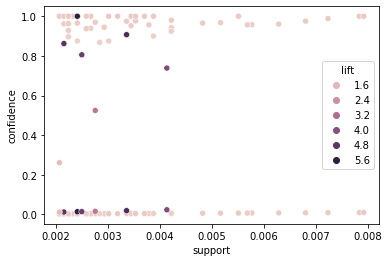

In [102]:
b_test = sns.scatterplot(data=rules_test,x='support',y='confidence',hue='lift')
plt.show()

In [103]:
# Classification with Association Rule Mining

def SupervisedApriori(data, consequent, min_supp, min_conf, min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

SupervisedApriori(df_train, consequent = ['IsSpam=Yes'],
min_supp=0.002, min_conf=0.5, min_lift=1).sort_values(by='support',ascending=False).head(5)

C:\Users\aredamonti\AppData\Local\Temp\ipykernel_24528\1949669956.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sup_rules = sup_rules.append(df,ignore_index = True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(words=free),(IsSpam=Yes),0.006210,0.188951,0.004847,0.780488,4.130642,0.003673,3.694780
5,(words=txt),(IsSpam=Yes),0.003597,0.188951,0.003219,0.894737,4.735292,0.002539,7.704968
3,(words=stop),(IsSpam=Yes),0.003938,0.188951,0.002916,0.740385,3.918400,0.002172,3.124042
4,(words=text),(IsSpam=Yes),0.004127,0.188951,0.002688,0.651376,3.447333,0.001909,2.326431
1,(words=mobile),(IsSpam=Yes),0.002954,0.188951,0.002613,0.884615,4.681725,0.002055,7.029094


In [104]:
SupervisedApriori(df_test, consequent = ['IsSpam=Yes'],
min_supp=0.002, min_conf=0.5, min_lift=1).sort_values(by='support',ascending=False).head(5)

C:\Users\aredamonti\AppData\Local\Temp\ipykernel_24528\1949669956.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sup_rules = sup_rules.append(df,ignore_index = True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(words=free),(IsSpam=Yes),0.005595,0.17724,0.004132,0.738462,4.166444,0.003140,3.145846
5,(words=txt),(IsSpam=Yes),0.003701,0.17724,0.003357,0.906977,5.117217,0.002701,8.844667
4,(words=text),(IsSpam=Yes),0.005251,0.17724,0.002755,0.524590,2.959769,0.001824,1.730633
3,(words=stop),(IsSpam=Yes),0.003099,0.17724,0.002496,0.805556,4.544992,0.001947,4.231336
1,(words=claim),(IsSpam=Yes),0.002410,0.17724,0.002410,1.000000,5.642059,0.001983,inf


In [105]:
#from pyarc import CBA, TransactionDB

#txns_train = TransactionDB.from_DataFrame(df_train)
#txns_test = TransactionDB.from_DataFrame(df_test)

#cba = CBA(support=0.20, confidence=0.5, algorithm="m1")
#cba.fit(txns_train)

#accuracy = cba.rule_model_accuracy(txns_test) 